In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Resources I found helpful:
* https://famous-neon-d70.notion.site/Introduction-to-Deep-Learning-and-its-Applications-e2d0fe44f5204c1cbc0b0068626a85ae
this was Stamatics Deep Learning project in which Iparticipated
* https://youtu.be/aircAruvnKk I really loved Grant's explanation over the 4 videos
* https://www.youtube.com/watch?v=w8yWXqWQYmU&ab_channel=SamsonZhang
* https://www.youtube.com/watch?v=7sB052Pz0sQ&t=2291s
* https://medium.com/analytics-vidhya/tensorflow-tutorial-a-beginners-guide-to-tensorflow-part-1-e8aa7e940c2d

In [2]:
# standard imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plte
%matplotlib inline
import tensorflow as tf
import tensorflow_hub as hub

## Getting our data ready
communication with our data and turning them into the tensors.All data must be in a numerical form.

Lets start by accessing our data and checking the labels.

In [3]:
labels_csv = pd.read_csv('/kaggle/input/dog-breed-identification/labels.csv')
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,5b903adeb4c923ba3046929c7062927a,scottish_deerhound
freq,1,126


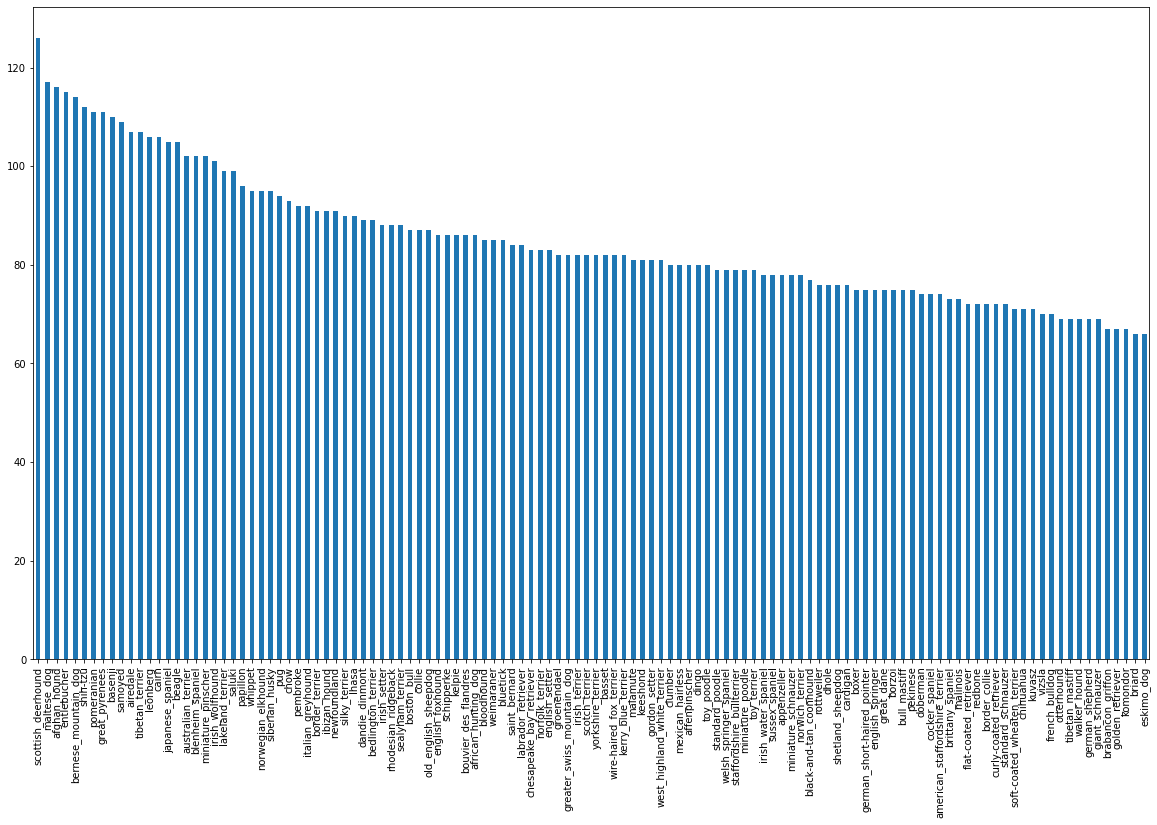

In [5]:
labels_csv['breed'].value_counts().plot.bar(figsize=(20,12));

In [6]:
#median number of image in each class.
labels_csv['breed'].value_counts().median()

82.0

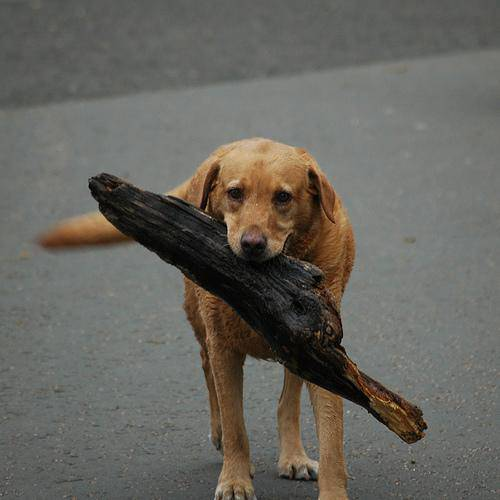

In [7]:
#viewing any image from the train data.
from IPython.display import Image
Image('../input/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg')

## Getting Images and their labels.
Create path names for image ID's.

In [8]:
filenames = ['/kaggle/input/dog-breed-identification/train/' + fname + '.jpg' for fname in labels_csv['id']]
filenames[:5]

['/kaggle/input/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/kaggle/input/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/kaggle/input/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/kaggle/input/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/kaggle/input/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

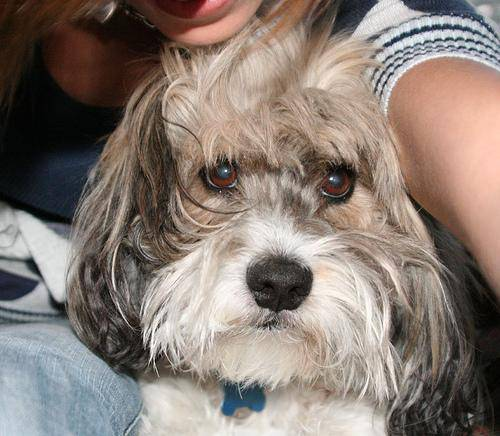

In [9]:
#visualizing images according to their index.
Image(filenames[900])

In [10]:
#finding the name of the above displayed dog.
labels_csv['breed'][900]

'lhasa'

## Turning our data into numbers

In [11]:
labels = labels_csv['breed']
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

Finding the unique labels values

In [12]:
unique_breed = np.unique(labels) 
unique_breed

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [13]:
#Turn single label into an array of boolean.
print(labels[0])
labels[0] == unique_breed

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

look at position (3,3) that is true representing our breed

In [14]:
#Turning every label into an array of boolean
boolean_labels = [labels == unique_breed for labels in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [15]:
# Turining boolean arrays into integers.
print(labels[0])   #orginal index
print(np.where(unique_breed==labels[0]))    #index where labels occurs.
print(boolean_labels[0].argmax())     #index where label occurs in boolean array
print(boolean_labels[0].astype(int))   #there will be a 1 where sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Creating our own validation set.

In [16]:
# setup x and y variables.
X = filenames
y = boolean_labels

First starting with 1000 images because we have lots of data to train

In [17]:
#set number of images to set for the experiment.
NUM_IMAGES = 1000 

In [18]:
#let's split our data into train and validation.
from sklearn.model_selection import train_test_split

#spliting into training and validation of total size NUM_IMAGES.

X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES],
                                                y[:NUM_IMAGES],
                                                test_size=0.2,
                                                random_state=42)
len(X_train),len(X_val),len(y_train),len(y_val)

(800, 200, 800, 200)

800 for training and 200 for validation

In [19]:
X_train[:5],y_train[:5]

(['/kaggle/input/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/kaggle/input/dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/kaggle/input/dog-breed-identification/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/kaggle/input/dog-breed-identification/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/kaggle/input/dog-breed-identification/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, Fa

# Preprocessing Images
Turning images into tensors

Let's write a function to preprocess the image. The function will do the following tasks.

* The function will take an image filepath as input.
* Use the tensorflow to read the file and save it to the variable.
* Turn our variable (.jpg) into tensors.
* convert color channel from 0-255 to 0-1
* Resize the images equally

In [20]:
# converting images to numpy array

from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [21]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [22]:
#lets conver them into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

### Making a function to preprocess the data.

In [23]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

### Turning our data into batches

Why turn our data into batches?

 We are trying to fit the 10000+ data images. They all might not fit into memory.

So,that's why we use 32(this is batch size) images at a time. we can change the batch size whenever we need. thats why we declare it as macro instead of writing 32 everywhere

In order to use the tensorflow effective we need to convert the images into tuple tensor which looks like (image,labels)

In [24]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

Let's make a function to turn all our data (x,y) into batches

In [25]:

# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch
#got this code from stackexchange
# I had to do a little bit of edits in names and others to make the errors go away

In [26]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [27]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

Look at that! We've got our data in batches


## Visualizing data batches

In [28]:
import matplotlib.pyplot as plt


def show_25_images(images, labels):
  plt.figure(figsize=(10, 10))
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title(unique_breed[labels[i].argmax()])
    plt.axis("off")  ####################

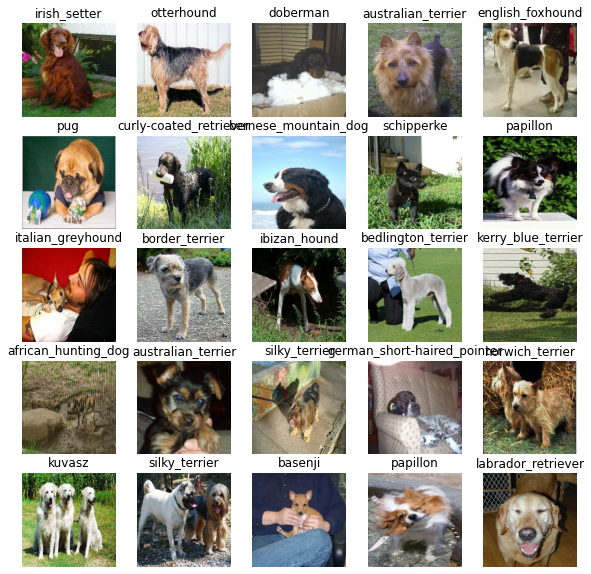

In [29]:
#images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

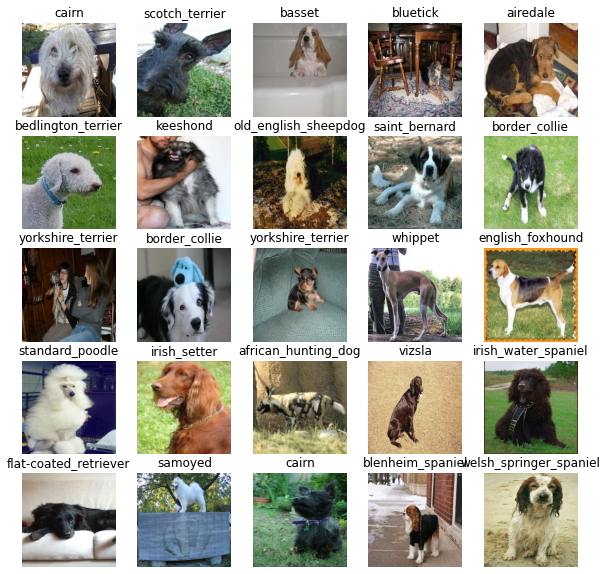

In [30]:
# images from the validation data batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

# Creating and training a model.



In [35]:
# Setting up input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setting up output shape of the model
OUTPUT_SHAPE = len(unique_breed) # number of unique labels

#Imagenet (ILSVRC-2012-CLS) classification with MobileNet V2 (depth multiplier 1.30).
#pre trained model
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

Now we've got the inputs, outputs and model we're using ready to go. We can start to put them together
let's create a function which:

* Defines the layers in a Keras model in a sequential fashion 
* Compiles the model (says how it should be evaluated and improved).
* Builds the model (tells it what kind of input shape it'll be getting).
* Returns the model.

In [36]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):  #defined above
  print("Building model with:", MODEL_URL)

  # Setup the model layers 2 layer deep
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  
  return model

In [45]:
# Create a model and check its details
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   multiple                  5432713   
_________________________________________________________________
dense_4 (Dense)              multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### Creating callbacks
We've got a model ready to go but before we train it we'll make some callbacks.

Callbacks are helper functions a model can use during training to savecheck a models progress or stop training early if a model stops improving (signifivcantly).

### Early Stopping Callback(prevent overfitting)
Early stopping helps prevent overfitting by stopping a model when a certain evaluation metric stops improving. 

It's basically like saying to our model, "keep finding patterns until u find patterns which dont make any sense."
it's like fil

In [46]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

## Training a model (On a subset of data)
Our first model is only going to be trained on 1000 images. Or trained on 800 images and then validated on 200 images, meaning 1000 images total or about 10% of the total data.

We do this to make sure everything is working. And if it is, we can step it up later and train on the entire training dataset.

The final parameter we'll define before training is NUM_EPOCHS (number of epochs).

NUM_EPOCHS defines how many passes of the data we'd like our model to do. A pass is our model trying to find patterns in each dog image and see which patterns relate to each label.

If NUM_EPOCHS=1, the model will only look at the data once and will score badly because it hasn't a chance to correct itself

iis like Revision for quizzes :)


In [47]:
NUM_EPOCHS = 100
# Build a function to train and return a trained model
def train_model():
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping]) #remember we cant train indefinitely lol
  
  return model

In [48]:
# Fit the model to the data
import os #was giving error so i imported it here itself
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


NameError: name 'create_tensorboard_callback' is not defined

It look like our model is overfitting now so it stopped after 2 repitions
See how it dipped from .6850 to .6800

## Making and evaluating predictions using a trained model

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions

In [53]:
# Check the shape of predictions
predictions.shape

(200, 120)

Making predictions with our model returns an array with a different value for each label.

In this case, making predictions on the validation data (200 images) returns an array (predictions) of arrays, each containing 120 different values (one for each unique dog breed).

These different values are the probabilities the model has predicted a certain image being a certain breed of dog. The higher the value, the more likely the model thinks a given image is a specific breed of dog.

In [54]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breed[np.argmax(predictions[0])]}") # the predicted label

[4.67921112e-04 4.32416746e-05 1.22154120e-03 1.95825982e-04
 3.67347471e-04 2.30088190e-05 1.17297899e-02 1.38108095e-04
 6.66204651e-05 6.27711706e-04 1.31719135e-04 2.28607561e-04
 2.25807395e-04 6.55893600e-05 9.79400284e-05 7.99456961e-04
 1.02628423e-04 1.81629732e-01 7.38592053e-06 3.93719165e-05
 1.87492595e-04 1.71957654e-04 2.04848147e-05 5.21127018e-04
 1.23043455e-05 1.11159708e-04 3.16128224e-01 8.05182208e-06
 2.83340887e-05 1.98838476e-04 7.60410257e-05 5.72014833e-04
 8.80991749e-04 2.56483727e-05 1.45104004e-05 3.05944420e-02
 1.14751256e-05 1.15003015e-04 6.56155098e-05 2.80755721e-05
 5.79600083e-03 6.56027760e-06 2.65759561e-04 3.28516646e-04
 6.91327841e-06 1.36869683e-04 4.30359323e-05 3.84677900e-04
 2.10082391e-04 5.02211442e-05 1.76341826e-04 4.53636676e-05
 2.46272975e-04 1.72413813e-04 5.03336305e-05 1.58302973e-05
 1.44877034e-04 1.83392363e-03 1.92256979e-04 1.69693381e-01
 7.21784076e-04 6.02197579e-05 7.29188439e-04 1.80422867e-04
 2.61156209e-04 1.341027

In [57]:
# Turn prediction probabilities into their respective label 
def get_pred_label(prediction_probabilities):
  return unique_breed[np.argmax(prediction_probabilities)]

pred_label = get_pred_label(predictions[0])
pred_label

'cairn'

woosh... all those numbers gone :)


Now we've got a list of all different predictions our model has made, we'll do the same for the validation images and validation labels.

The model hasn't trained on the validation data, during the fit() function, it only used the validation data to evaluate itself. So we can use the validation images to compare our models predictions with the validation labels.

Since our validation data (val_data) is in batch form, to get a list of validation images and labels, we'll have to unbatch it (using unbatch()) and then turn it into an iterator using as_numpy_iterator().

Let's make a small function to do so.

In [59]:
# Create a function to unbatch a batched dataset
def unbatchify(data):

  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breed[np.argmax(label)])
  return images, labels #array of image label

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

we want to be able to view an image, its predicted label and its actual label (true label).

The first function we'll create will:

* Take an array of prediction probabilities, an array of truth labels, an array of images and an integer.
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and target image on a single plot.

In [64]:
def plot_pred(prediction_probabilities, labels, images, n=1):

  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])


  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.2f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

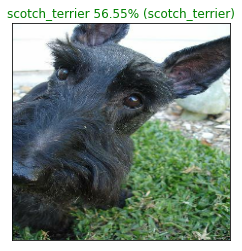

In [65]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

Since we're working with a multi-class problem (120 different dog breeds), it would also be good to see what other guesses our model is making. More specifically, if our model predicts a certain label with 24% probability, what else did it predict?

Let's build a function to demonstrate. The function will:

* Take an input of a prediction probabilities array, a ground truth labels array and an integer.
* Find the predicted label using get_pred_label().
* Find the top 10:

  ( Prediction probabilities indexes )
  
  ( Prediction probabilities values)
  
  ( Prediction labels)
* Plot the top 10 prediction probability values and labels, coloring the true label green.

**I got this idea from another user's submission in Kaggle and thought it would be cool if I also implement this

In [75]:
def plot_pred_conf(prediction_probabilities, labels, n=1):

  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breed[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="black")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

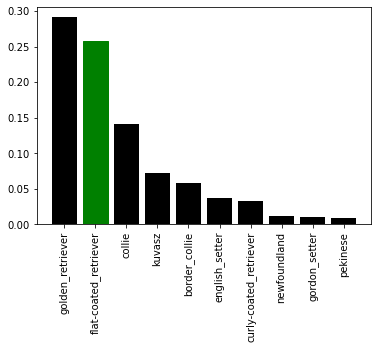

In [76]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=20)

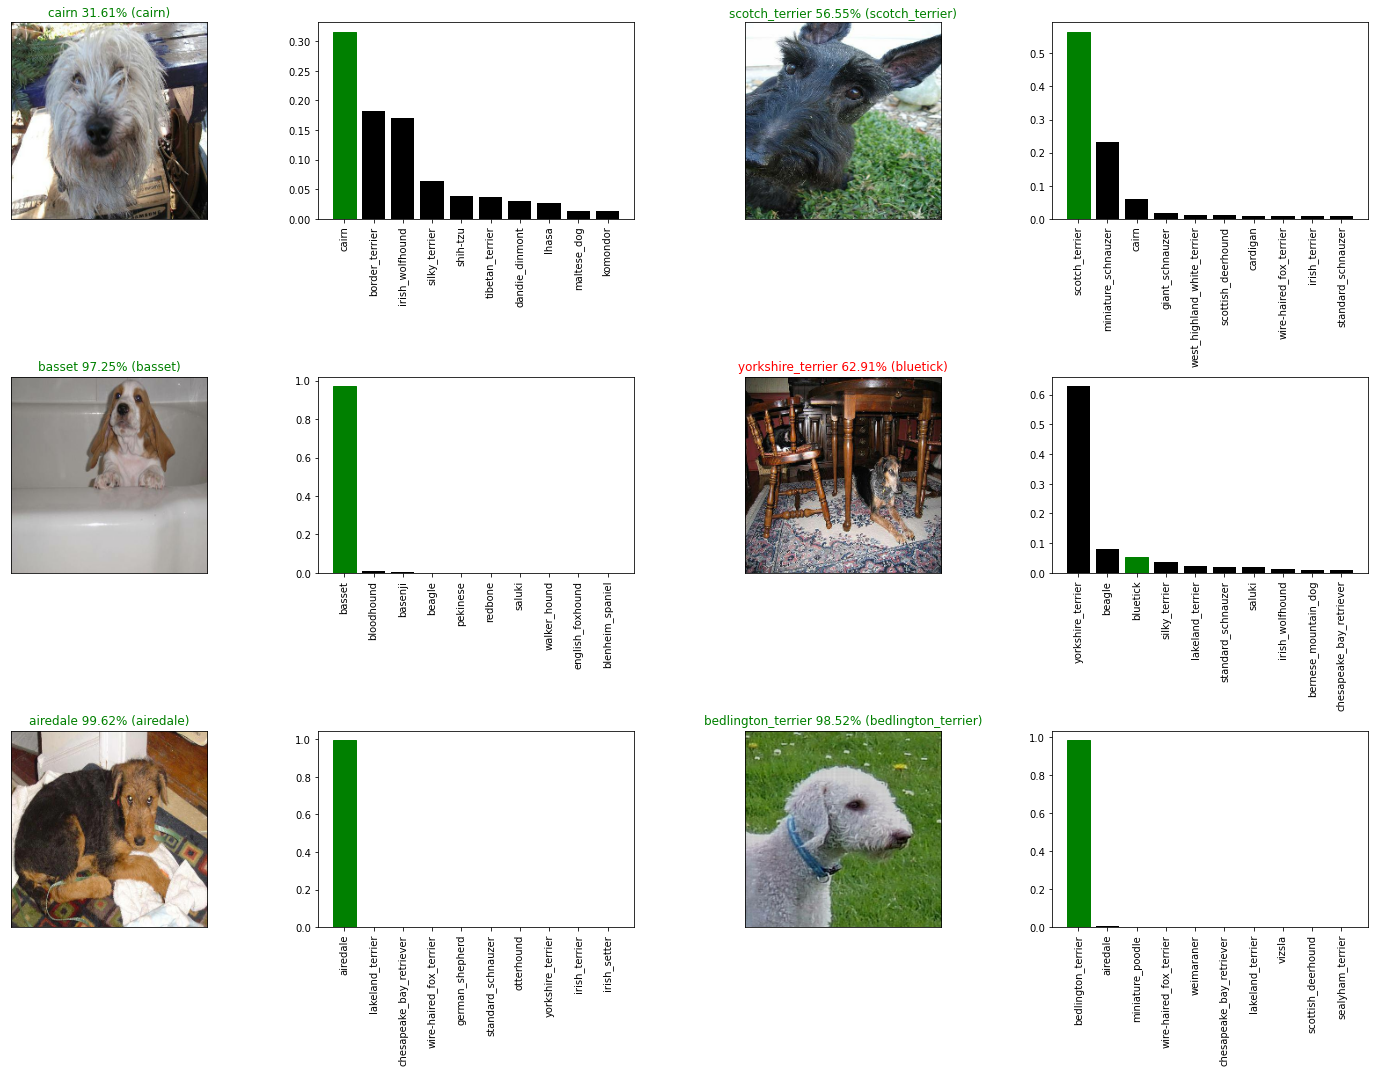

In [77]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Training a model in full dataset


In [78]:
len(X),len(y)

(10222, 10222)

 We've got over 10,000 images and labels in our training set.

Before we can train a model on these, we'll have to turn them into a data batch.

In [79]:
# Turn full training data in a data batch
full_data = create_data_batches(X, y)

Creating training data batches...


Our data is in a data batch, all we need now is a model.
Let's use create_model() 

In [41]:
# Instantiate a new model for training on the full dataset
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


Since we've made a new model instance, full_model, we'll need some callbacks too.

In [42]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# Early stopping callback
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

NameError: name 'create_tensorboard_callback' is not defined

Fitting the full model to the full training data with about 10000+ images

In [31]:
full_model.fit(x=full_data,
               epochs=5,
               callbacks=[full_model_tensorboard, 
                          full_model_early_stopping])

NameError: name 'full_model' is not defined

#### I cant find the tensorflow callback function 
#### I accidently deleted it i think and dont have much time left so I'm leaving it here sorry
